In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Functions for use downstream

def read_file(filename,cols=['Date','Adj Close']):
    columns = cols
    df= pd.read_csv(filename, index_col="Date",
                    parse_dates=True,usecols=columns,
                    na_values=['nan'])
    return df   


def test_multi_read(folder_path,start_date,
                    end_date,symbols,log=False,
                    cols=['Date','Adj Close']):
    #Define date range
    print("symbols requested: ", symbols)
    dates =  pd.date_range(start_date,end_date)
    print("date range selected:", dates)
    columns = cols
    #Create empty dataframe with dates index
    df1 = pd.DataFrame(index=dates)
    if log==True:
        print(df1)

    for symbol in symbols:
        filename =  folder_path + '{}'.format(symbol) + '.csv'
        if log==True:
             print(filename)
        df_temp = read_file(filename,columns)
        if log==True:
            print(df_temp.head())
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp, how="inner")
        if log==True:
             print(df1.head())
    return df1

In [62]:
# Testing for new functions
def plot_data(df,title="Stock prices"):
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    df_temp = df.loc[start_index:end_index,columns]
    plot_data(df_temp)
    
def normalize_data(df):
    """Normalize data with respect to first entry in the dataframe"""
    return df/df.iloc[0,:]

def plot_normalized_data(df,title="Stock prices"):
    """Plot normalized data"""
    df = normalize_data(df)
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.axhline(y=1,color="black",linestyle="--")
    plt.show()

symbols requested:  ['SPY', 'GOOG', 'IBM', 'GLD', 'CAT', 'DE']
date range selected: DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')


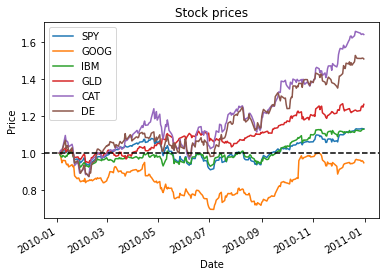

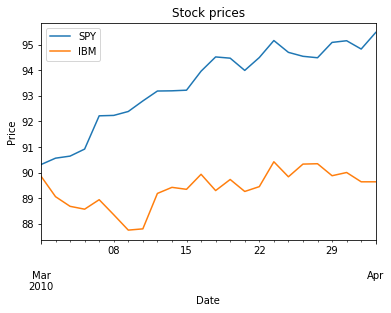

In [63]:
if __name__ == "__main__":
    sym = ['SPY','GOOG','IBM','GLD','CAT','DE']
    fol_path = '../data/raw/'
    strt_date = '2010-01-01'
    fin_date = '2010-12-31'
    cols_selected = ['Date','Adj Close']
    df = test_multi_read(fol_path,strt_date,fin_date,sym,cols=cols_selected)
    plot_normalized_data(df)
    sub_range_start = '2010-03-01'
    sub_range_end = '2010-04-01'
    cols = ['SPY','IBM']
    plot_selected(df,cols,sub_range_start,sub_range_end)

